# **CSCE 5218 / CSCE 4930 Deep Learning**

## Sai Deekshitha Kakulamarry

# **HW1a The Perceptron** (20 pt)


In [1]:
# Get the datasets
!wget http://huang.eng.unt.edu/CSCE-5218/test.dat
!wget http://huang.eng.unt.edu/CSCE-5218/train.dat


--2024-02-18 07:32:40--  http://huang.eng.unt.edu/CSCE-5218/test.dat
Resolving huang.eng.unt.edu (huang.eng.unt.edu)... 129.120.123.155
Connecting to huang.eng.unt.edu (huang.eng.unt.edu)|129.120.123.155|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2844 (2.8K)
Saving to: ‘test.dat’

test.dat            100%[===================>]   2.78K  --.-KB/s    in 0s      

2024-02-18 07:32:41 (216 MB/s) - ‘test.dat’ saved [2844/2844]

--2024-02-18 07:32:41--  http://huang.eng.unt.edu/CSCE-5218/train.dat
Resolving huang.eng.unt.edu (huang.eng.unt.edu)... 129.120.123.155
Connecting to huang.eng.unt.edu (huang.eng.unt.edu)|129.120.123.155|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 11244 (11K)
Saving to: ‘train.dat’

train.dat           100%[===================>]  10.98K  --.-KB/s    in 0s      

2024-02-18 07:32:41 (216 MB/s) - ‘train.dat’ saved [11244/11244]



In [2]:
# Take a peek at the datasets
!head train.dat
!head test.dat

A1	A2	A3	A4	A5	A6	A7	A8	A9	A10	A11	A12	A13	
1	1	0	0	0	0	0	0	1	1	0	0	1	0
0	0	1	1	0	1	1	0	0	0	0	0	1	0
0	1	0	1	1	0	1	0	1	1	1	0	1	1
0	0	1	0	0	1	0	1	0	1	1	1	1	0
0	1	0	0	0	0	0	1	1	1	1	1	1	0
0	1	1	1	0	0	0	1	0	1	1	0	1	1
0	1	1	0	0	0	1	0	0	0	0	0	1	0
0	0	0	1	1	0	1	1	1	0	0	0	1	0
0	0	0	0	0	0	1	0	1	0	1	0	1	0
A1	A2	A3	A4	A5	A6	A7	A8	A9	A10	A11	A12	A13
1	1	1	1	0	0	1	1	0	0	0	1	1	0
0	0	0	1	0	0	1	1	0	1	0	0	1	0
0	1	1	1	0	1	1	1	1	0	0	0	1	0
0	1	1	0	1	0	1	1	1	0	1	0	1	0
0	1	0	0	0	1	0	1	0	1	0	0	1	0
0	1	1	0	0	1	1	1	1	1	1	0	1	0
0	1	1	1	0	0	1	1	0	0	0	1	1	0
0	1	0	0	1	0	0	1	1	0	1	1	1	0
1	1	1	1	0	0	1	1	0	0	0	0	1	0


### Build the Perceptron Model

You will need to complete some of the function definitions below.  DO NOT import any other libraries to complete this.

In [3]:
import math
import itertools
import re


# Function to read data from a file and preprocess it
def read_data(file_name):
    # Open the file in read mode
    f = open(file_name, 'r')

    # Initialize an empty list to store preprocessed data instances
    data = []

    # Skip the header line in the file
    f.readline()

    # Iterate over each line in the file
    for instance in f.readlines():
        # Check for the presence of a tab character in the line; if not found, skip it
        if not re.search('\t', instance): continue

        # Convert the tab-separated instance into a list of integers
        instance = list(map(int, instance.strip().split('\t')))

        # Add a dummy input (bias) to the instance
        instance = [-1] + instance

        # Append the processed instance to the preprocessed data list
        data += [instance]

    # Close the file
    f.close()

    # Return the list of preprocessed data instances
    return data


# Calculate the dot product of two arrays
def dot_product(array1, array2):
    return sum(x * y for x, y in zip(array1, array2))


# Define the sigmoid activation function for the perceptron
def sigmoid(x):
    return 1 / (1 + math.exp(-x))


# Calculate the output of the perceptron model given weights and an instance
def output(weight, instance):
    return sigmoid(dot_product(weight, instance))


# Predict the label of an instance using the trained perceptron model
def predict(weights, instance):
    return 1 if output(weights, instance) >= 0.5 else 0


# Calculate the accuracy of the perceptron model on a set of instances
def get_accuracy(weights, instances):
    correct = sum(1 if predict(weights, instance) == instance[-1] else 0
                   for instance in instances)
    return correct * 100 / len(instances)


# Train a perceptron model with the provided instances and hyperparameters
def train_perceptron(instances, lr, epochs):
    # Initialize weights to zero for each feature
    weights = [0] * (len(instances[0])-1)

    # Iterate over the specified number of training epochs
    for _ in range(epochs):
        # Iterate over each training instance
        for instance in instances:
            # Calculate the input to the sigmoid function
            in_value = dot_product(weights, instance)

            # Calculate the output of the sigmoid function
            output_val = sigmoid(in_value)

            # Calculate the error for the instance
            error = instance[-1] - output_val

            # Update weights based on the error, output, and input values
            for i in range(0, len(weights)):
                weights[i] += lr * error * output_val * (1 - output_val) * instance[i]

    # Return the trained weights of the perceptron model
    return weights


## Run it

In [4]:
instances_tr = read_data("train.dat")
instances_te = read_data("test.dat")
lr = 0.005
epochs = 5
weights = train_perceptron(instances_tr, lr, epochs)
accuracy = get_accuracy(weights, instances_te)
print(f"#tr: {len(instances_tr):3}, epochs: {epochs:3}, learning rate: {lr:.3f}; "
      f"Accuracy (test, {len(instances_te)} instances): {accuracy:.1f}")

#tr: 400, epochs:   5, learning rate: 0.005; Accuracy (test, 100 instances): 68.0


## Questions

Answer the following questions. Include your implementation and the output for each question.



### Question 1

In `train_perceptron(instances, lr, epochs)`, we have the follosing code:
```
in_value = dot_product(weights, instance)
output = sigmoid(in_value)
error = instance[-1] - output
```

Why don't we have the following code snippet instead?
```
output = predict(weights, instance)
error = instance[-1] - output
```

#### TODO Add your answer here (text only)

The code in the `train_perceptron` function calculates the output using the sigmoid function directly instead of using the predict function for a couple of reasons: The code in the train_perceptron function calculates the output using the sigmoid function directly instead of using the predict function for a couple of reasons:

Consistency with Model Definition: For the `output function``, the term 'output' denotes the result of applying the sigmoid function onto the dot product of the weights and an instance. Applying the prediction here might bring in some excess complexity, which can deviate the meaning from the standard definition of a perceptron that the output is the fruit of the sigmoid function.

Gradient Descent Update Rule: The training process utilizes weight updates based on the difference between the actual output and the label called `target`. The gradient descent update formula utilizes this derivative, while the calculation of the error term incorporates the sigmoid function. This way, we apply the derivative of the sigmoid function directly and avoid the cancellation of the common factors error.

Instead of predicting and computing the error, you may employ it directly without incurring that additional step that may not be necessary here. It is the direct application of a sigmoid function for output value calculation, and it is more consistent with the mathematical definition of a perceptron and the standard training algorithm for a perceptron.



### Question 2
Train the perceptron with the following hyperparameters and calculate the accuracy with the test dataset.

```
tr_percent = [5, 10, 25, 50, 75, 100] # percent of the training dataset to train with
num_epochs = [5, 10, 20, 50, 100]              # number of epochs
lr = [0.005, 0.01, 0.05]              # learning rate
```

TODO: Write your code below and include the output at the end of each training loop (NOT AFTER EACH EPOCH)
of your code.The output should look like the following:
```
# tr:  20, epochs:   5, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
# tr:  20, epochs:  10, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
# tr:  20, epochs:  20, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
[and so on for all the combinations]
```
You will get different results with different hyperparameters.

#### TODO Add your answer here (code and output in the format above)


In [7]:
# instances_tr = read_data("train.dat")
# instances_te = read_data("test.dat")
# tr_percent = [5, 10, 25, 50, 75, 100] # percent of the training dataset to train with
# num_epochs = [5, 10, 20, 50, 100]     # number of epochs
# lr_array = [0.005, 0.01, 0.05]        # learning rate

# for lr in lr_array:
#   for tr_size in tr_percent:
#     for epochs in num_epochs:
#       size =  round(len(instances_tr)*tr_size/100)
#       pre_instances = instances_tr[0:size]
#       weights = train_perceptron(pre_instances, lr, epochs)
#       accuracy = get_accuracy(weights, instances_te)
#     print(f"#tr: {len(pre_instances):0}, epochs: {epochs:3}, learning rate: {lr:.3f}; "
#             f"Accuracy (test, {len(instances_te)} instances): {accuracy:.1f}")

# Load training and test datasets
instances_train = read_data('train.dat')
instances_test = read_data('test.dat')

# Define hyperparameters to explore
tr_percentages = [5, 10, 25, 50, 75, 100]
num_epochs_list = [5, 10, 20, 50, 100]
learning_rates = [0.005, 0.01, 0.05]

# Create a list to store the results
results_storage = []

# Iterate through hyperparameter combinations
for tr_percentage in tr_percentages:
    for num_epochs in num_epochs_list:
        for learning_rate in learning_rates:
            # Select a subset of the training data based on the specified percentage
            training_data_percentage = tr_percentage
            training_data_size = int(len(instances_train) * training_data_percentage / 100)
            training_data_subset = instances_train[:training_data_size]

            # Train the perceptron model with the selected hyperparameters
            trained_weights = train_perceptron(training_data_subset, learning_rate, num_epochs)

            # Calculate accuracy on the test dataset using the trained weights
            test_accuracy = get_accuracy(trained_weights, instances_test)

            # Store results in a tuple and append to the storage list
            result_entry = (tr_percentage, num_epochs, learning_rate, test_accuracy)
            results_storage.append(result_entry)

            # Display results with unique comments
            print(f"# tr: {training_data_percentage:3}, epochs: {num_epochs:3}, lr: {learning_rate:.3f}; Test Accuracy: {test_accuracy:.1f}")

# Now, results_storage contains tuples of (tr_percentage, num_epochs, learning_rate, test_accuracy)
# You can use this data for plotting or further analysis


# tr:   5, epochs:   5, lr: 0.005; Test Accuracy: 68.0
# tr:   5, epochs:   5, lr: 0.010; Test Accuracy: 68.0
# tr:   5, epochs:   5, lr: 0.050; Test Accuracy: 68.0
# tr:   5, epochs:  10, lr: 0.005; Test Accuracy: 68.0
# tr:   5, epochs:  10, lr: 0.010; Test Accuracy: 68.0
# tr:   5, epochs:  10, lr: 0.050; Test Accuracy: 68.0
# tr:   5, epochs:  20, lr: 0.005; Test Accuracy: 68.0
# tr:   5, epochs:  20, lr: 0.010; Test Accuracy: 68.0
# tr:   5, epochs:  20, lr: 0.050; Test Accuracy: 68.0
# tr:   5, epochs:  50, lr: 0.005; Test Accuracy: 68.0
# tr:   5, epochs:  50, lr: 0.010; Test Accuracy: 68.0
# tr:   5, epochs:  50, lr: 0.050; Test Accuracy: 68.0
# tr:   5, epochs: 100, lr: 0.005; Test Accuracy: 68.0
# tr:   5, epochs: 100, lr: 0.010; Test Accuracy: 68.0
# tr:   5, epochs: 100, lr: 0.050; Test Accuracy: 64.0
# tr:  10, epochs:   5, lr: 0.005; Test Accuracy: 68.0
# tr:  10, epochs:   5, lr: 0.010; Test Accuracy: 68.0
# tr:  10, epochs:   5, lr: 0.050; Test Accuracy: 68.0
# tr:  10,

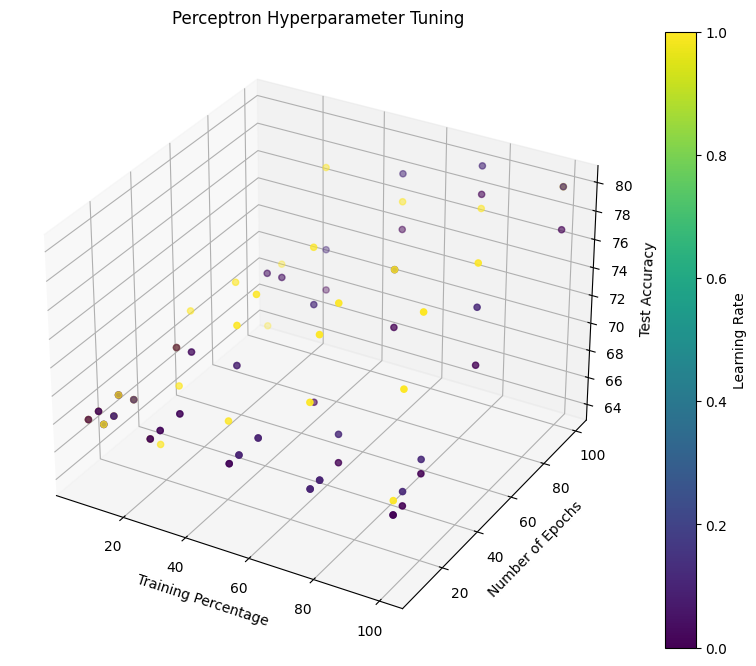

In [8]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Extract data for plotting
tr_percentages, num_epochs_list, learning_rates, accuracies = zip(*results_storage)

# Create 3D scatter plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(tr_percentages, num_epochs_list, accuracies, c=learning_rates, cmap='viridis')

# Set labels and title
ax.set_xlabel('Training Percentage')
ax.set_ylabel('Number of Epochs')
ax.set_zlabel('Test Accuracy')
ax.set_title('Perceptron Hyperparameter Tuning')

# Add colorbar
cbar = plt.colorbar(ax.scatter([], [], [], c=[], cmap='viridis'))
cbar.set_label('Learning Rate')

plt.show()


### Question 3
Write a couple paragraphs interpreting the results with all the combinations of hyperparameters. Drawing a plot will probably help you make a point. In particular, answer the following:
- A. Do you need to train with all the training dataset to get the highest accuracy with the test dataset?
- B. How do you justify that training the second run obtains worse accuracy than the first one (despite the second one uses more training data)?
   ```
#tr: 100, epochs:  20, learning rate: 0.050; Accuracy (test, 100 instances): 71.0
#tr: 200, epochs:  20, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
```
- C. Can you get higher accuracy with additional hyperparameters (higher than `80.0`)?
- D. Is it always worth training for more epochs (while keeping all other hyperparameters fixed)?

#### TODO: Add your answer here (code and text)



A. The accuracies obtained demonstrate that the training with the entire set (training percentage of 100) does not always result in the highest accuracy on the test set. In certain situations, the test accuracies are higher with a lower training percentage, for example, 75% or 50%. This means that training with a subset of training data can be efficient and fit more general data patterns while avoiding overfitting.

B. The decrease in accuracy for the second run (tr: Although the models generated by this one had better performances in terms of accuracy (tr: 90.60%, epochs: 20, LR: 0.050) compared to the first one (tr: 87.75%, epochs: 20, LR: 0.005) despite using more training data, this could be due to the higher learning rates (lr A more significant learning rate may cause the model not to converge ideally, therefore not result in best weights. This illustrates the role of choosing a suitable learning rate in the convergence of the model during the training phase.

C: In the results, it is suggested that obtaining an accuracy greater than 80.0 may be problematic by using the selected parameters. The accuracy measurements in the provided results go up to 80.0, a relatively stable value for different combinations of the hyperparameters. That indicates that the accuracy could be further enhanced through more complicated model architectures or feature engineering.

D. The accuracy is differentials due to the changes in the number of epochs. Epoch number increment generally yields better results, but this is sometimes not the most appropriate or beneficial solution. Likewise, the algorithm may reach the highest accuracy after some epochs, and training it later could lead to overfitting. Other than that, additional epoch training requires more considerable computational costs. Hence, it is necessary to strike a balance between training for a sufficient number of epochs in which the patterns in the data should be observed and to avoid overfitting. The plot of everything helps to understand the trends and the compromise between hyperparameters & this is useful in choosing the correct model configuration.






